In [1]:
!pip install prophet


   ---------------------------------------- 0.0/12.1 MB ? eta -:--:--
   ----- ---------------------------------- 1.6/12.1 MB 10.5 MB/s eta 0:00:02
   ------------ --------------------------- 3.9/12.1 MB 10.9 MB/s eta 0:00:01
   -------------------- ------------------- 6.3/12.1 MB 11.0 MB/s eta 0:00:01
   ---------------------------- ----------- 8.7/12.1 MB 11.0 MB/s eta 0:00:01
   ------------------------------------ --- 11.0/12.1 MB 11.2 MB/s eta 0:00:01
   ---------------------------------------- 12.1/12.1 MB 10.5 MB/s  0:00:01
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ---------------------------------------- 1.4/1.4 MB 11.0 MB/s  0:00:00

   -------- ------------------------------- 1/5 [importlib_resources]
   ---------------- ----------------------- 2/5 [holidays]
   ---------------- ----------------------- 2/5 [holidays]
   ---------------- ----------------------- 2/5 [holidays]
   ---------------- ----------------------- 2/5 [holidays]
   ----------

In [2]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt


In [3]:
df = pd.read_csv("../data/cleaned_sales.csv")
df.head()


,Date,Sales
0,2018-01-01,450
1,2018-01-02,470
2,2018-01-03,465


In [4]:
df_prophet = df.rename(columns={
    "Date": "ds",
    "Sales": "y"
})

df_prophet.head()


,ds,y
0,2018-01-01,450
1,2018-01-02,470
2,2018-01-03,465


In [5]:
model = Prophet()
model.fit(df_prophet)


12:14:03 - cmdstanpy - INFO - Chain [1] start processing
12:14:07 - cmdstanpy - INFO - Chain [1] done processing


In [6]:
future = model.make_future_dataframe(periods=5)
future.tail()


,ds
3,2018-01-04
4,2018-01-05
5,2018-01-06
6,2018-01-07
7,2018-01-08


In [7]:
forecast = model.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()


,ds,yhat,yhat_lower,yhat_upper
3,2018-01-04,460.000000,447.076900,469.437854
4,2018-01-05,455.000000,413.093241,491.292952
5,2018-01-06,450.000000,370.055863,530.955309
6,2018-01-07,444.999999,314.000858,573.768020
7,2018-01-08,439.999999,258.240265,622.262002


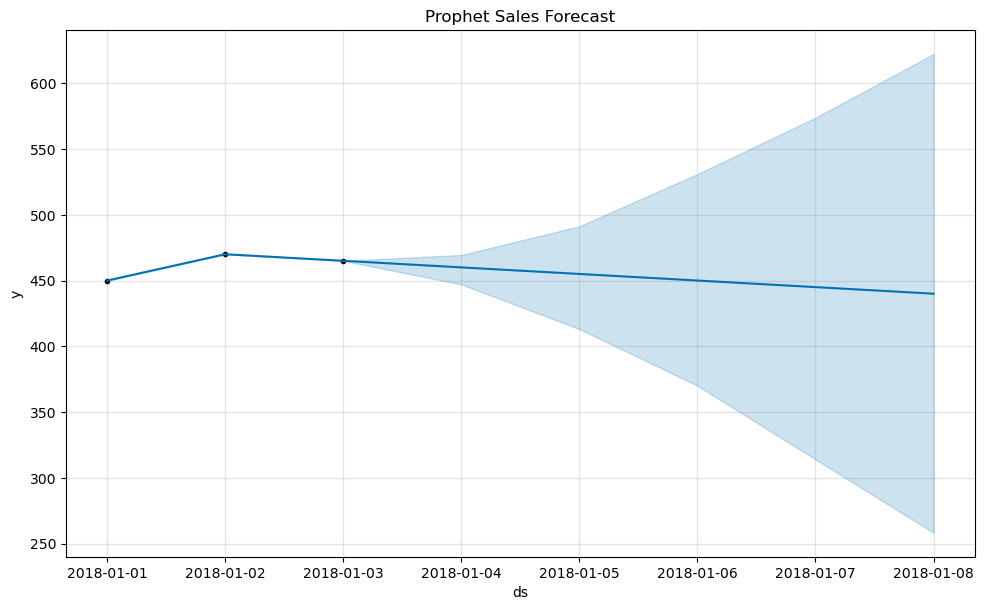

In [8]:
model.plot(forecast)
plt.title("Prophet Sales Forecast")
plt.show()


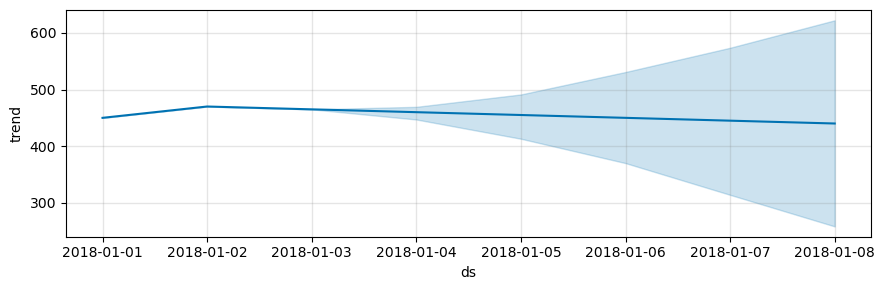

In [9]:
model.plot_components(forecast)
plt.show()
